# Circuiti 3

In [55]:
import numpy as np
from iminuit import Minuit
from iminuit.cost import LeastSquares
from scipy.stats import chi2
import matplotlib.pyplot as plt
from uncertainties import ufloat
import uncertainties.umath as uu

In [56]:
R_gen = ufloat(51.7,0.6)

### Circuito RC

In [57]:
R = 266.6 #ohm
R_tot = R + R_gen 
C = 10 * 10 ** (-9) #farad

freq = 1 / (R_tot*C*2*np.pi)
print(freq)

(5.000+/-0.009)e+04


In [58]:
data = np.loadtxt("Dati/RC_v2.txt") #media di 16 campionamenti

freq = []
Vin = [] #picco picco
Vout = []
Vin_out = []
phdiff = [] #phase difference

for i in range(len(data)):
    freq.append(data[i][0] * 1000)
    Vin.append(data[i][1])
    Vout.append(data[i][2])
    Vin_out.append(data[i][3])
    phdiff.append(np.pi/2 + data[i][4] * np.pi / 180)

freq = np.array(freq)
Vin = np.array(Vin)
Vout = np.array(Vout)
Vin_out = np.array(Vin_out)
phdiff = np.array(phdiff)

#### Funzione di trasferimento del condensatore

Modulo

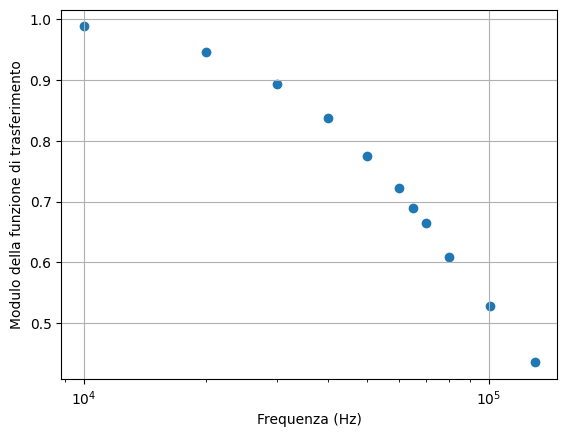

In [59]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel("Frequenza (Hz)")
ax.set_ylabel("Modulo della funzione di trasferimento")
ax.set_xscale("log")
#ax.set_yscale("log")

plt.scatter(freq, Vout/Vin)

plt.grid()
plt.show()

In [60]:
def model(x,a):
    return 1 / np.sqrt(a*x**2 + 1)

V_err = 0.01 * Vout/Vin

minimi_quadrati = LeastSquares(freq, Vout/Vin, V_err, model)

m = Minuit(minimi_quadrati, a = 10**(-15))
m.migrad()
m.hesse()
display(m)

def func(x):
    return chi2.cdf(x,m.ndof)

pvalue = func(np.inf) - func(m.fval)
print("p value: " + str(pvalue))
print(m.ndof)

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 4.064 (χ²/ndof = 0.4)      │              Nfcn = 38               │
│ EDM = 2.47e-06 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ a    │ 257.9e-12 │  3.2e-12  │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───┬───────┐
│   │     a │
├───┼───────┤
│ a │ 1e-23 │
└───┴───────┘

p value: 0.9444024938481694
10.0


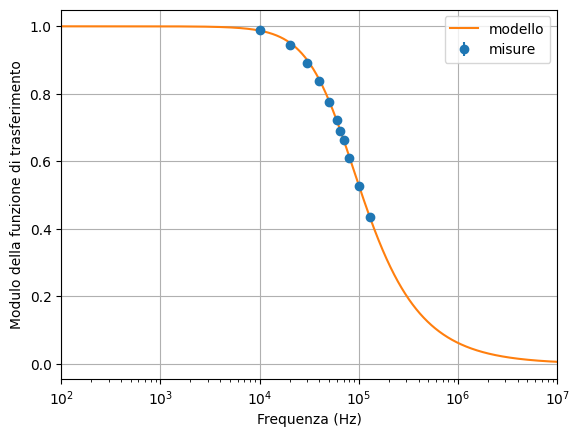

In [61]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel("Frequenza (Hz)")
ax.set_ylabel("Modulo della funzione di trasferimento")
ax.set_xscale("log")

plt.errorbar(freq, Vout/Vin, V_err, fmt='o', label='misure')
x = np.linspace(min(freq)/100,max(freq)*100,100000)
y = model(x,m.values["a"])
plt.plot(x,y, label='modello')
ax.set_xlim(100,10**7)

plt.grid()
plt.legend()
plt.show()

Fase

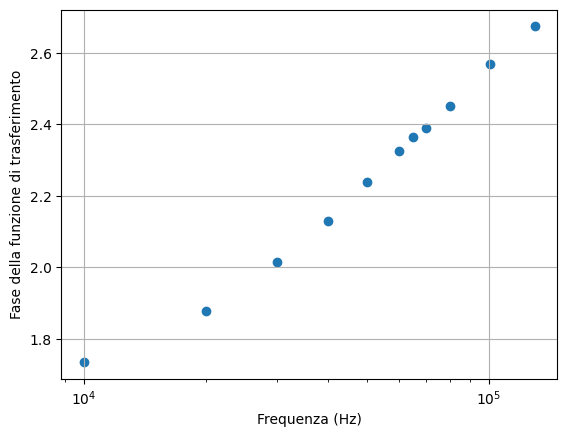

In [62]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel("Frequenza (Hz)")
ax.set_ylabel("Fase della funzione di trasferimento")
ax.set_xscale("log")

plt.scatter(freq, phdiff)

plt.grid()
plt.show()

In [63]:
def model(x,a):
    return a / x

tan_ph = np.tan(phdiff)
ph_err = abs(0.04 * tan_ph)

minimi_quadrati = LeastSquares(freq, tan_ph, ph_err, model)

m = Minuit(minimi_quadrati, a = -100)
m.migrad()
m.hesse()
display(m)

def func(x):
    return chi2.cdf(x,m.ndof)

pvalue = func(np.inf) - func(m.fval)
print("p value: " + str(pvalue))
print(m.ndof)

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 3.931 (χ²/ndof = 0.4)      │              Nfcn = 18               │
│ EDM = 1.31e-08 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ a    │  -64.0e3  │   0.8e3   │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───┬──────────┐
│   │        a │
├───┼──────────┤
│ a │ 5.96e+05 │
└───┴──────────┘

p value: 0.9503865597871377
10.0


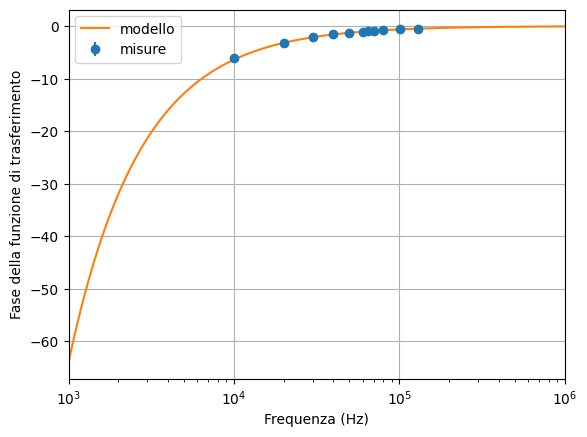

In [64]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel("Frequenza (Hz)")
ax.set_ylabel("Fase della funzione di trasferimento")
ax.set_xscale("log")

plt.errorbar(freq, np.tan(phdiff), ph_err, fmt='o', label='misure')
x = np.linspace(min(freq)/10,max(freq)*10,100000)
y = model(x,m.values["a"])
plt.plot(x,y, label='modello')
ax.set_xlim(1000,10**6)


plt.grid()
plt.legend()
plt.show()

#### Funzione di trasferimento della resistenza

Modulo

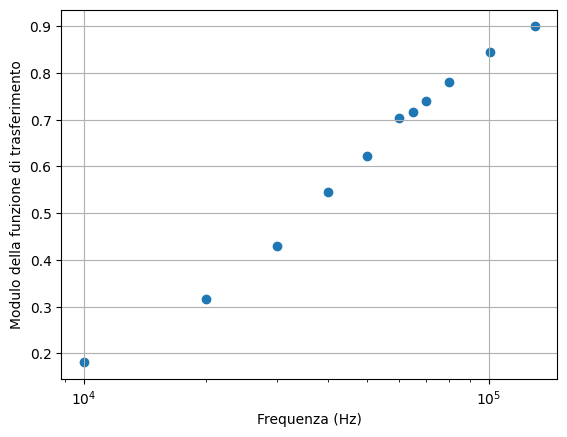

In [65]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel("Frequenza (Hz)")
ax.set_ylabel("Modulo della funzione di trasferimento")
ax.set_xscale("log")
#ax.set_yscale("log")

plt.scatter(freq, Vin_out/Vin)

plt.grid()
plt.show()

In [66]:
def model(x,a):
    return 1 / np.sqrt(1 + a/(x**2))

V_err = 0.04 * Vin_out/Vin

minimi_quadrati = LeastSquares(freq, Vin_out/Vin, V_err, model)

m = Minuit(minimi_quadrati, a = 1)
m.migrad()
m.hesse()
display(m)

def func(x):
    return chi2.cdf(x,m.ndof)

pvalue = func(np.inf) - func(m.fval)
print("p value: " + str(pvalue))
print(m.ndof)

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 8.165 (χ²/ndof = 0.8)      │              Nfcn = 57               │
│ EDM = 1.11e-21 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │     Covariance FORCED pos. def.      │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ a    │3.6388841879e9│0.0000000014e9│            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───┬───┐
│   │ a │
├───┼───┤
│ a │ 2 │
└───┴───┘

p value: 0.6126919829605711
10.0


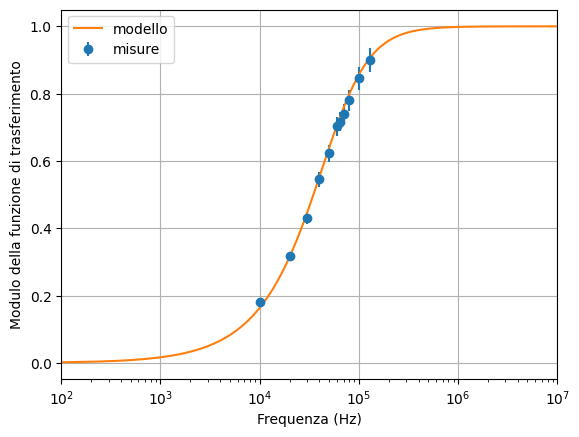

In [67]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel("Frequenza (Hz)")
ax.set_ylabel("Modulo della funzione di trasferimento")
ax.set_xscale("log")

plt.errorbar(freq, Vin_out/Vin, V_err, fmt='o', label='misure')
x = np.linspace(min(freq)/100,max(freq)*100,100000)
y = model(x,m.values["a"])
plt.plot(x,y, label='modello')
ax.set_xlim(100,10**7)

plt.grid()
plt.legend()
plt.show()

### Circuito RL

In [68]:
R = 266.6 #ohm
R_tot = R + 50 
L = 35 * 10 ** (-3) #farad

freq = R_tot / (L*2*np.pi)
print(freq)

1439.6701423684017


In [69]:
data = np.loadtxt("Dati/RL.txt") #media di 16 campionamenti

freq = []
Vin = [] #picco picco
Vout = []
Vin_out = []
phdiff = [] #phase difference

for i in range(len(data)):
    freq.append(data[i][0] * 1000)
    Vin.append(data[i][1])
    Vout.append(data[i][2])
    Vin_out.append(data[i][3])
    phdiff.append(np.pi/2 + data[i][4] * np.pi / 180)

freq = np.array(freq)
Vin = np.array(Vin)
Vout = np.array(Vout)
Vin_out = np.array(Vin_out)
phdiff = np.array(phdiff)

#### Funzione di trasferimento dell'induttore

Modulo

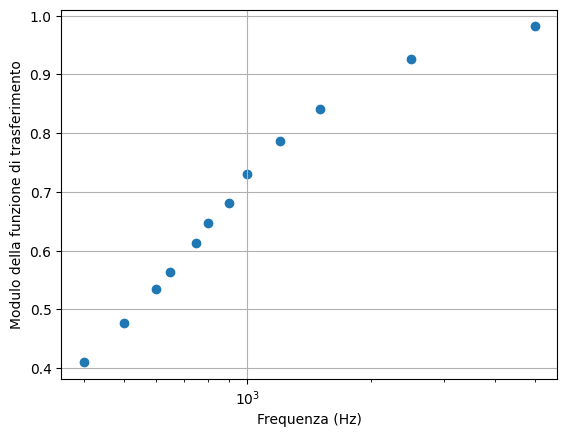

In [70]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel("Frequenza (Hz)")
ax.set_ylabel("Modulo della funzione di trasferimento")
ax.set_xscale("log")

plt.scatter(freq, Vout/Vin)

plt.grid()
plt.show()

In [71]:
def model(x,a):
    return 1 / np.sqrt(1 + a/(x**2))

V_err = 0.02 * Vout/Vin

minimi_quadrati = LeastSquares(freq, Vout/Vin, V_err, model)

m = Minuit(minimi_quadrati, a = 1)
m.migrad()
m.hesse()
display(m)

def func(x):
    return chi2.cdf(x,m.ndof)

pvalue = func(np.inf) - func(m.fval)
print("p value: " + str(pvalue))
print(m.ndof)

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 7.44 (χ²/ndof = 0.7)       │              Nfcn = 39               │
│ EDM = 2.85e-09 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ a    │  0.878e6  │  0.018e6  │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───┬──────────┐
│   │        a │
├───┼──────────┤
│ a │ 3.37e+08 │
└───┴──────────┘

p value: 0.7624324673448617
11.0


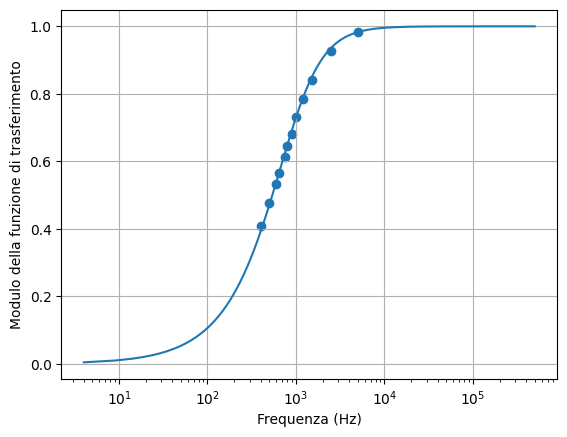

In [72]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel("Frequenza (Hz)")
ax.set_ylabel("Modulo della funzione di trasferimento")
ax.set_xscale("log")

plt.scatter(freq, Vout/Vin)
x = np.linspace(min(freq)/100,max(freq)*100,100000)
y = model(x,m.values["a"])
plt.plot(x,y)

plt.grid()
plt.show()

Fase

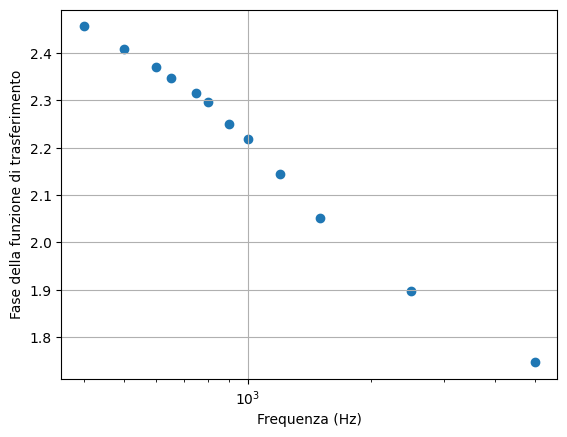

In [73]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel("Frequenza (Hz)")
ax.set_ylabel("Fase della funzione di trasferimento")
ax.set_xscale("log")

plt.scatter(freq, phdiff)

plt.grid()
plt.show()

In [74]:
def model(x,a):
    return a * x

tan_ph = np.tan(phdiff)
ph_err = 0.04 * tan_ph

minimi_quadrati = LeastSquares(freq, tan_ph, ph_err, model)

m = Minuit(minimi_quadrati, a = -100)
m.migrad()
m.hesse()
display(m)

def func(x):
    return chi2.cdf(x,m.ndof)

pvalue = func(np.inf) - func(m.fval)
print("p value: " + str(pvalue))
print(m.ndof)

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 183.7 (χ²/ndof = 16.7)     │              Nfcn = 20               │
│ EDM = 1.33e-07 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ a    │ -1.382e-3 │ 0.016e-3  │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───┬──────────┐
│   │        a │
├───┼──────────┤
│ a │ 2.61e-10 │
└───┴──────────┘

p value: 0.0
11.0


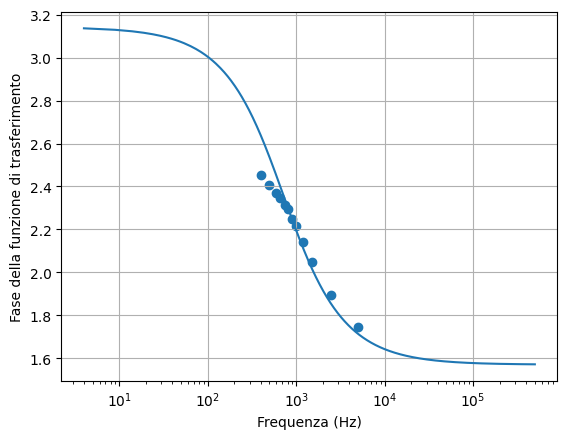

In [75]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel("Frequenza (Hz)")
ax.set_ylabel("Fase della funzione di trasferimento")
ax.set_xscale("log")

plt.scatter(freq, phdiff)
x = np.linspace(min(freq)/100,max(freq)*100,100000)
y = np.pi + np.arctan(model(x,m.values["a"]))
plt.plot(x,y)

plt.grid()
plt.show()

#### Funzione di trasferimento della resistenza

In [76]:
def model(x,a):
    return 1 / np.sqrt(1 + a*(x**2))

V_err = 0.06 * Vin_out/Vin

minimi_quadrati = LeastSquares(freq, Vin_out/Vin, V_err, model)

m = Minuit(minimi_quadrati, a = 0.00000001)
m.strategy = 2
m.migrad()
m.hesse()
display(m)

def func(x):
    return chi2.cdf(x,m.ndof)

pvalue = func(np.inf) - func(m.fval)
print("p value: " + str(pvalue))
print(m.ndof)

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 19.77 (χ²/ndof = 1.8)      │              Nfcn = 56               │
│ EDM = 2.2e-09 (Goal: 0.0002)     │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ a    │  1.61e-6  │  0.10e-6  │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───┬──────────┐
│   │        a │
├───┼──────────┤
│ a │ 9.52e-15 │
└───┴──────────┘

p value: 0.04856901258291879
11.0


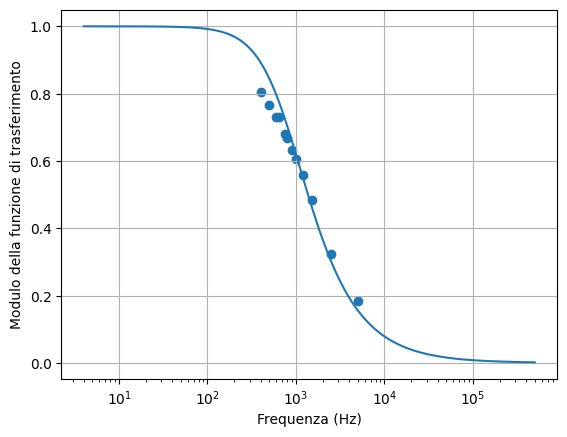

In [77]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel("Frequenza (Hz)")
ax.set_ylabel("Modulo della funzione di trasferimento")
ax.set_xscale("log")

plt.scatter(freq, Vin_out/Vin)
x = np.linspace(min(freq)/100,max(freq)*100,100000)
y = model(x,m.values["a"])
plt.plot(x,y)

plt.grid()
plt.show()

### Circuito RLC

### Funzione di trasferimento della resistenza

In [78]:
L = 14 * 10 ** (-3)
C = 10 * 10 ** (-9)
R = 266.6 #ohm
R_tot = R + 50 
V0 = 6.5

omega0 = 1/np.sqrt(L*C)
print(omega0/(2*np.pi))

13451.047731519027


In [79]:
data = np.loadtxt("Dati/RLC_R.txt") #media di 16 campionamenti

freq = []
Vin = [] #picco picco
Vout = []
phdiff = [] #phase difference

if len(data.shape) == 1:
    data = data.reshape(-1, 4)  # Assuming 4 columns

freq = data[:, 0] * 1000
Vin = data[:, 1]
Vout = data[:, 2]
phdiff = data[:, 3] * np.pi / 180

freq = np.array(freq)
Vin = np.array(Vin)
Vout = np.array(Vout)
phdiff = np.array(phdiff)

freq_R = np.array(freq)
Vin_R = np.array(Vin)
Vout_R = np.array(Vout)
phdiff_R = np.array(phdiff)

Modulo

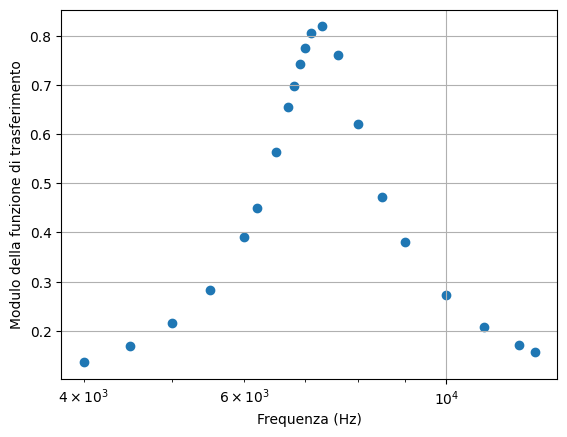

In [80]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel("Frequenza (Hz)")
ax.set_ylabel("Modulo della funzione di trasferimento")
ax.set_xscale("log")
#ax.set_yscale("log")

plt.scatter(freq, Vout/Vin)

plt.grid()
plt.show()

In [81]:
a0 = 1/(V0**2) - (2*L/C) / ((R * V0)**2)
b0 = L**2 / ((R*V0)**2)
c0 = 1 / ((C*R*V0)**2)
print(a0,b0,c0)

-0.9087501747993895 6.526931696968508e-11 3330067192.33087


In [82]:
def model(x,a,b,c):
    return 1 / np.sqrt(a + b*x**2 + c/(x**2))

V_err = 0.02 * Vout/Vin

minimi_quadrati = LeastSquares(freq, Vout/Vin, V_err, model)

m = Minuit(minimi_quadrati, a = a0, b = b0, c = c0)
m.strategy = 2
m.limits["a"] = (None, 0)
m.limits["b", "c"] = (0, None)
m.migrad()
m.hesse()
display(m)

def func(x):
    return chi2.cdf(x,m.ndof)

pvalue = func(np.inf) - func(m.fval)
print("p value: " + str(pvalue))
print(m.ndof)

/tmp/ipykernel_5286/192734475.py:2: RuntimeWarning: invalid value encountered in sqrt
  return 1 / np.sqrt(a + b*x**2 + c/(x**2))


┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 11.97 (χ²/ndof = 0.7)      │              Nfcn = 441              │
│ EDM = 1.42e-07 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ a    │   -62.1   │    0.9    │            │            │         │    0    │       │
│ 1 │ b    │  596e-9   │   8e-9    │            │            │    0    │         │       │
│ 2 │ c    │  1.696e9  │  0.024e9  │            │            │    0    │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───┬───────────────────────────────────────────────────────────────────┐
│   │                     a                     b                     c │
├───┼───────────────────────────────────────────────────────────────────┤
│ a │                 0.794        -7.41176116e-9         -20.8010072e6 │
│ b │        -7.41176116e-9               7.2e-17 187.12192953899026e-3 │
│ c │         -20.8010072e6 187.12192953899026e-3              5.64e+14 │
└───┴───────────────────────────────────────────────────────────────────┘

p value: 0.848719036569059
18.0


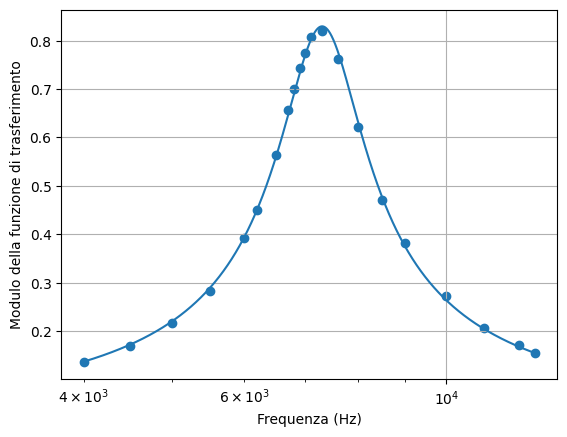

In [83]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel("Frequenza (Hz)")
ax.set_ylabel("Modulo della funzione di trasferimento")
ax.set_xscale("log")

plt.scatter(freq, Vout/Vin)
x = np.linspace(min(freq),max(freq),10000)
y = model(x,m.values["a"],m.values["b"],m.values["c"])
plt.plot(x,y)

plt.grid()
plt.show()

In [84]:
R_tot = ufloat(R_tot, 0.02*R_tot)
b = ufloat(m.values["b"], m.errors["b"])
c = ufloat(m.values["c"], m.errors["c"])


L_mod = uu.sqrt(b * R_tot**2) / (2*np.pi)
C_mod = 1 / (2*np.pi*R_tot*uu.sqrt(c))

print("L: " + str(L_mod))
print("C: " + str(C_mod))

L: 0.0389+/-0.0008
C: (1.221+/-0.026)e-08


Fase

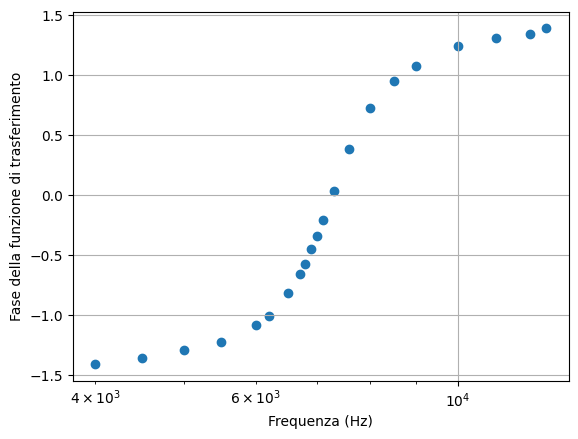

In [85]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel("Frequenza (Hz)")
ax.set_ylabel("Fase della funzione di trasferimento")
ax.set_xscale("log")
#ax.set_yscale("log")

plt.scatter(freq, phdiff)
plt.grid()
plt.show()

In [86]:
def model(x,a,b):
    return a*x + b/x

err = 0.05 * np.tan(phdiff)

minimi_quadrati = LeastSquares(freq, np.tan(phdiff), err, model)

m = Minuit(minimi_quadrati, a = 1, b = 1)
m.strategy = 2
m.migrad()
m.hesse()
display(m)

def func(x):
    return chi2.cdf(x,m.ndof)

pvalue = func(np.inf) - func(m.fval)
print("p value: " + str(pvalue))
print(m.ndof)

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 20.53 (χ²/ndof = 1.1)      │              Nfcn = 80               │
│ EDM = 2.69e-15 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ a    │  635e-6   │   7e-6    │            │            │         │         │       │
│ 1 │ b    │  -33.6e3  │   0.4e3   │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───┬───────────────────────────────┐
│   │              a              b │
├───┼───────────────────────────────┤
│ a │       4.89e-11 -2.59482787e-3 │
│ b │ -2.59482787e-3       1.38e+05 │
└───┴───────────────────────────────┘

p value: 0.36342863890064514
19.0


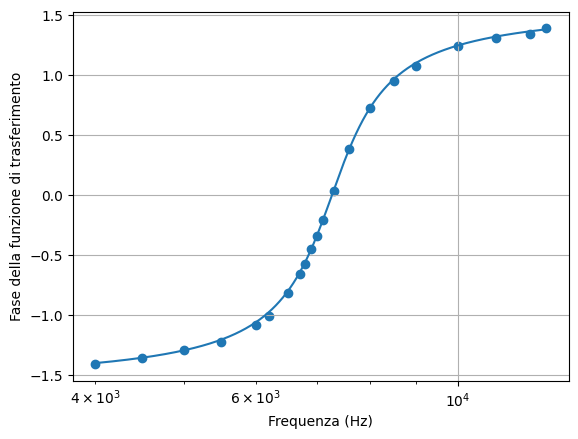

In [87]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel("Frequenza (Hz)")
ax.set_ylabel("Fase della funzione di trasferimento")
ax.set_xscale("log")

plt.scatter(freq, phdiff)
x = np.linspace(min(freq),max(freq),10000)
y = np.arctan(model(x,m.values["a"],m.values["b"]))
plt.plot(x,y)

plt.grid()
plt.show()

In [88]:
a = ufloat(m.values["a"], m.errors["a"])
b = ufloat(m.values["b"], m.errors["b"])


L_fase = a * R_tot / (2*np.pi)
C_fase = -1 / (2*np.pi*b*R_tot)

print("L: " + str(L_fase))
print("C: " + str(C_fase))

L: 0.0320+/-0.0007
C: (1.497+/-0.034)e-08


Studio di L e C

In [89]:
t_L = abs(L_mod.nominal_value - L_fase.nominal_value) / np.sqrt(L_mod.std_dev**2 + L_fase.std_dev**2)
t_C = abs(C_mod.nominal_value - C_fase.nominal_value) / np.sqrt(C_mod.std_dev**2 + C_fase.std_dev**2)

print(t_L, t_C)

6.241429665222526 6.434852096080459


#### Funzione di trasferimento dell'induttore v1

In [90]:
R = ufloat(300, 3) #ohm
R_tot = R + R_gen
C = 10 * 10 ** (-9) #farad
L = 10**(-3) #henry, non lo sappiamo ordine di grandezza
V0 = 6 #volt

In [91]:
data = np.loadtxt("Dati/RLC_Lv1.txt") #media di 16 campionamenti

freq = []
Vin = [] #picco picco
Vout = []
phdiff = [] #phase difference

if len(data.shape) == 1:
    data = data.reshape(-1, 4)  # Assuming 4 columns

freq = data[:, 0]
Vin = data[:, 1]
Vout = data[:, 2]
phdiff = data[:, 3] * np.pi / 180

freq = np.array(freq)
Vin = np.array(Vin)
Vout = np.array(Vout)
phdiff = np.array(np.pi/2 - phdiff)

freq_L = np.array(freq)
Vin_L = np.array(Vin)
Vout_L = np.array(Vout)
phdiff_L = np.array(np.pi/2 - phdiff)

Modulo

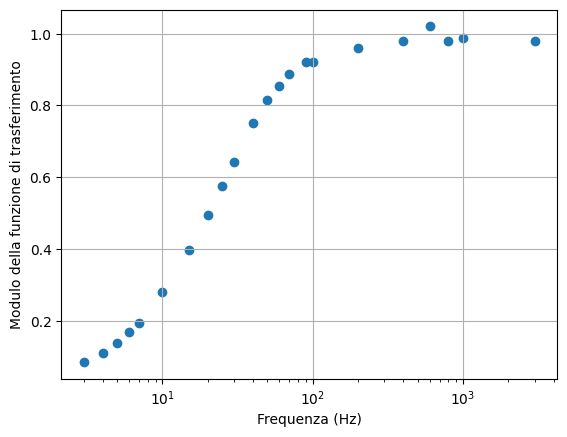

In [92]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel("Frequenza (Hz)")
ax.set_ylabel("Modulo della funzione di trasferimento")
ax.set_xscale("log")
#ax.set_yscale("log")

plt.scatter(freq, Vout/Vin)

plt.grid()
plt.show()

In [93]:
a0 = R.nominal_value**2/(L**2) - 2/(C*L)
b0 = 1
c0 = 1/(C*L)**2
print(a0,b0,c0)

-109999999999.99997 1 9.999999999999998e+21


In [94]:
def model(x,a,b):
    return x / np.sqrt(a + 4*np.pi**2*x**2 + b/(x**2))

V_err = 0.02 * Vout/Vin

minimi_quadrati = LeastSquares(freq, Vout/Vin, V_err, model)

m = Minuit(minimi_quadrati, a = a0, b = c0)
m.strategy = 2
m.limits["b"] = (0, None)
m.migrad()
m.hesse()
display(m)

def func(x):
    return chi2.cdf(x,m.ndof)

pvalue = func(np.inf) - func(m.fval)
print("p value: " + str(pvalue))
print(m.ndof)

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 5.5e+04 (χ²/ndof = 2750.0) │              Nfcn = 38               │
│ EDM = 4.34e-32 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ a    │-110.000000000e9│0.000000002e9│            │            │         │         │       │
│ 1 │ b    │   1e22    │   0e22    │            │            │    0    │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───┬───────┐
│   │  a  b │
├───┼───────┤
│ a │  4 -0 │
│ b │ -0  4 │
└───┴───────┘

p value: 0.0
20.0


Fase

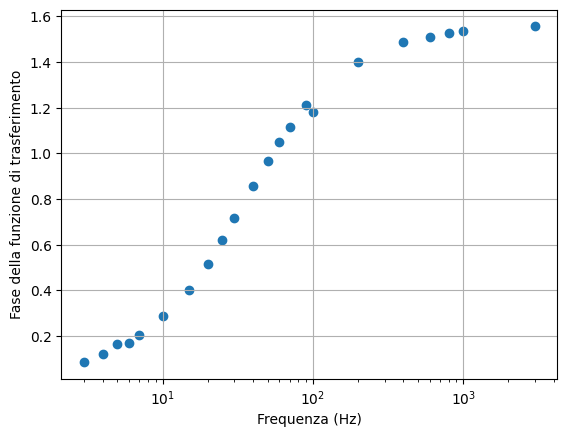

In [95]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel("Frequenza (Hz)")
ax.set_ylabel("Fase della funzione di trasferimento")
ax.set_xscale("log")
#ax.set_yscale("log")

plt.scatter(freq, phdiff)
plt.grid()
plt.show()

In [96]:
def model(x,a,b):
    return a*x + b/x

err = 0.05 * np.tan(phdiff)

minimi_quadrati = LeastSquares(freq, np.tan(phdiff), err, model)

m = Minuit(minimi_quadrati, a = 1, b = 1)
m.strategy = 2
m.migrad()
m.hesse()
display(m)

def func(x):
    return chi2.cdf(x,m.ndof)

pvalue = func(np.inf) - func(m.fval)
print("p value: " + str(pvalue))
print(m.ndof)

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 53.62 (χ²/ndof = 2.7)      │              Nfcn = 48               │
│ EDM = 1.36e-12 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ a    │ 27.83e-3  │  0.33e-3  │            │            │         │         │       │
│ 1 │ b    │   0.026   │   0.012   │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───┬───────────────────┐
│   │        a        b │
├───┼───────────────────┤
│ a │ 1.09e-07 -1.57e-6 │
│ b │ -1.57e-6 0.000135 │
└───┴───────────────────┘

p value: 6.582867784232782e-05
20.0


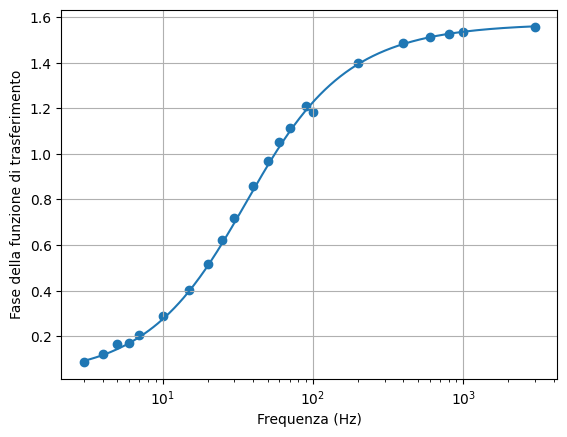

In [97]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel("Frequenza (Hz)")
ax.set_ylabel("Fase della funzione di trasferimento")
ax.set_xscale("log")

plt.scatter(freq, phdiff)
x = np.linspace(min(freq),max(freq),10000)
y = np.arctan(model(x,m.values["a"],m.values["b"]))
plt.plot(x,y)

plt.grid()
plt.show()

#### Funzione di trasferimento del condensatore

In [98]:
R = ufloat(300,3) #ohm
R_tot = R + R_gen
C = 10 * 10 ** (-9) #farad
L = 10**(-3) #henry, non lo sappiamo ordine di grandezza
V0 = 6 #volt

In [99]:
data = np.loadtxt("Dati/RLC_C.txt") #media di 16 campionamenti

freq = []
Vin = [] #picco picco
Vout = []
phdiff = [] #phase difference

if len(data.shape) == 1:
    data = data.reshape(-1, 4)  # Assuming 4 columns

freq = data[:, 0] * 1000
Vin = data[:, 1]
Vout = data[:, 2]
phdiff = data[:, 3] * np.pi / 180

freq = np.array(freq)
Vin = np.array(Vin)
Vout = np.array(Vout)
phdiff = np.array(phdiff + np.pi/2)

freq_C = np.array(freq)
Vin_C = np.array(Vin)
Vout_C = np.array(Vout)
phdiff_C = np.array(phdiff + np.pi/2)

Modulo

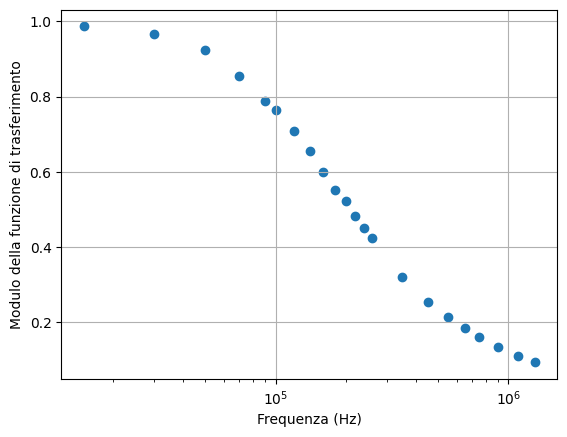

In [100]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel("Frequenza (Hz)")
ax.set_ylabel("Modulo della funzione di trasferimento")
ax.set_xscale("log")
#ax.set_yscale("log")

plt.scatter(freq, Vout/Vin)

plt.grid()
plt.show()

In [101]:
C = 4*10**(-9)
L = 10**(-5)

In [102]:
a0 = (R.nominal_value*C)**2 - 2*L*C
b0 = (2*np.pi*L*C)**2
print(a0,b0)

1.3600000000000003e-12 6.31654681669719e-26


In [103]:
def model(x,a,b):
    return 1 / (x * np.sqrt(a + b*x**2 + 1/(4*np.pi**2*x**2)))

V_err = 0.05 * Vout

minimi_quadrati = LeastSquares(freq, Vout, V_err, model)

m = Minuit(minimi_quadrati, a = a0, b = b0)
m.strategy = 2
m.migrad()
m.hesse()
display(m)

def func(x):
    return chi2.cdf(x,m.ndof)

pvalue = func(np.inf) - func(m.fval)
print("p value: " + str(pvalue))
print(m.ndof)

/tmp/ipykernel_5286/1372538453.py:2: RuntimeWarning: invalid value encountered in sqrt
  return 1 / (x * np.sqrt(a + b*x**2 + 1/(4*np.pi**2*x**2)))


┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 652 (χ²/ndof = 32.6)       │              Nfcn = 488              │
│ EDM = nan (Goal: 0.0002)         │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│         INVALID Minimum          │   ABOVE EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │     Covariance FORCED pos. def.      │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ a    │ 1.36e-12  │    nan    │            │            │         │         │       │
│ 1 │ b    │6.3165e-26 │    nan    │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───┬─────────┐
│   │   a   b │
├───┼─────────┤
│ a │ nan nan │
│ b │ nan nan │
└───┴─────────┘

p value: 0.0
20.0


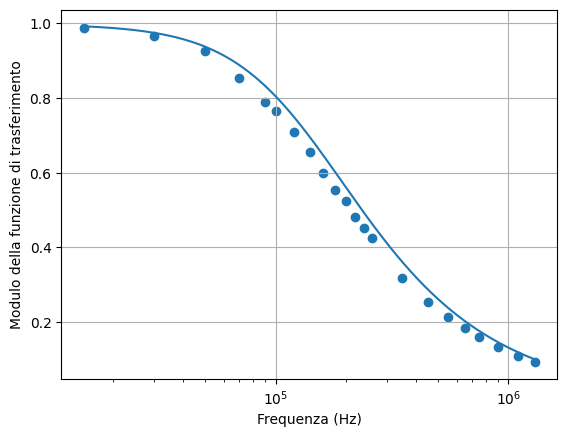

In [104]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel("Frequenza (Hz)")
ax.set_ylabel("Modulo della funzione di trasferimento")
ax.set_xscale("log")

plt.scatter(freq, Vout/Vin)
x = np.linspace(min(freq),max(freq),10000)
y = model(x,a0,b0)/6.3
plt.plot(x,y)

plt.grid()
plt.show()

Fase

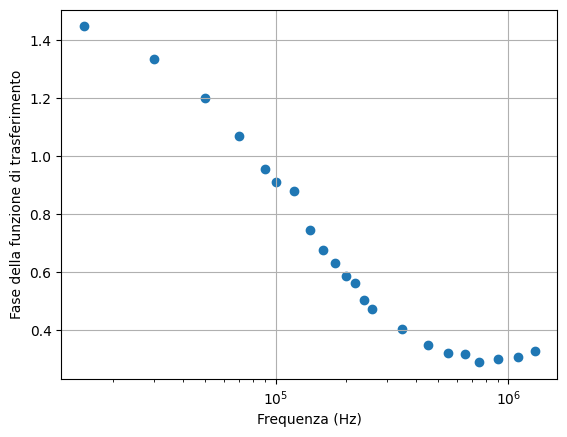

In [105]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel("Frequenza (Hz)")
ax.set_ylabel("Fase della funzione di trasferimento")
ax.set_xscale("log")
#ax.set_yscale("log")

plt.scatter(freq, phdiff)
plt.grid()
plt.show()

In [106]:
def model(x,a,b):
    return a*x + b/x

err = 0.05 * np.tan(phdiff)

minimi_quadrati = LeastSquares(freq, np.tan(phdiff), err, model)

m = Minuit(minimi_quadrati, a = 1, b = 1)
m.strategy = 2
m.migrad()
m.hesse()
display(m)

def func(x):
    return chi2.cdf(x,m.ndof)

pvalue = func(np.inf) - func(m.fval)
print("p value: " + str(pvalue))
print(m.ndof)

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 8.315 (χ²/ndof = 0.4)      │              Nfcn = 66               │
│ EDM = 5.08e-07 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ a    │  185e-9   │   8e-9    │            │            │         │         │       │
│ 1 │ b    │  126.1e3  │   1.7e3   │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───┬─────────────────────────────────────┐
│   │                 a                 b │
├───┼─────────────────────────────────────┤
│ a │          5.79e-17 -5.23692650475e-6 │
│ b │ -5.23692650475e-6          2.96e+06 │
└───┴─────────────────────────────────────┘

p value: 0.9895661366588577
20.0


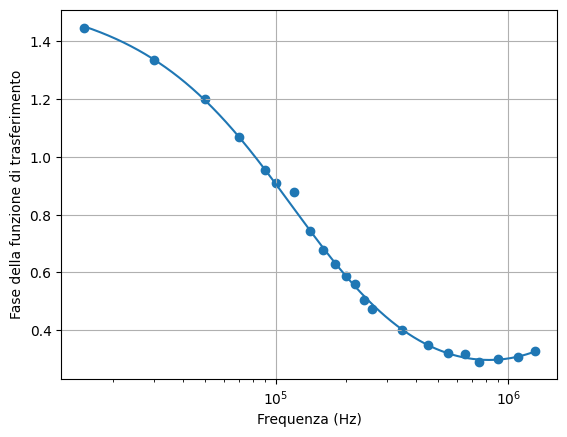

In [107]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel("Frequenza (Hz)")
ax.set_ylabel("Fase della funzione di trasferimento")
ax.set_xscale("log")

plt.scatter(freq, phdiff)
x = np.linspace(min(freq),max(freq),10000)
y = np.arctan(model(x,m.values["a"],m.values["b"]))
plt.plot(x,y)

plt.grid()
plt.show()

In [108]:
a = ufloat(m.values["a"], m.errors["a"])
b = ufloat(m.values["b"], m.errors["b"])


L_fase = a * R_tot / (2*np.pi)
C_fase = -1 / (2*np.pi*b*R_tot)

print("L: " + str(L_fase))
print("C: " + str(C_fase))

L: (1.03+/-0.04)e-05
C: (-3.59+/-0.06)e-09
